### Importing Libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import marineHeatWaves as mhw
import pandas as pd
import numpy as np
from datetime import date
import exploratory_data_analysis_mhw_script as mhw_eda


### MHW Analysis in the Regions

#### Bay of Bengal

##### Training Dataset Analysis

Total Marine Heatwave Events: 74

Details of Detected Marine Heatwaves:
Event 1:
  Start Date       : 1982-09-21
  End Date         : 1982-09-25
  Duration         : 5 days
  Max Intensity    : 0.61 °C
  Mean Intensity   : 0.54 °C
  Cumulative Int.  : 2.71 °C·days
----------------------------------------
Event 2:
  Start Date       : 1982-10-04
  End Date         : 1982-10-08
  Duration         : 5 days
  Max Intensity    : 0.92 °C
  Mean Intensity   : 0.73 °C
  Cumulative Int.  : 3.64 °C·days
----------------------------------------
Event 3:
  Start Date       : 1983-05-15
  End Date         : 1983-05-24
  Duration         : 10 days
  Max Intensity    : 0.98 °C
  Mean Intensity   : 0.89 °C
  Cumulative Int.  : 8.90 °C·days
----------------------------------------
Event 4:
  Start Date       : 1983-05-29
  End Date         : 1983-06-02
  Duration         : 5 days
  Max Intensity    : 0.78 °C
  Mean Intensity   : 0.75 °C
  Cumulative Int.  : 3.73 °C·days
--------------------------------

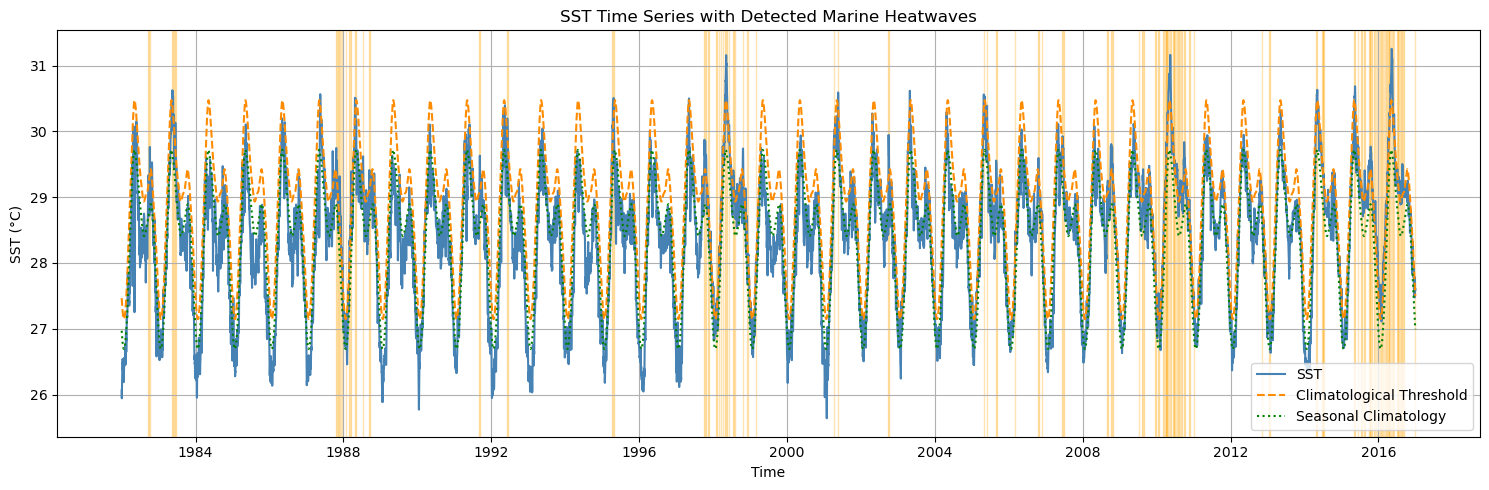

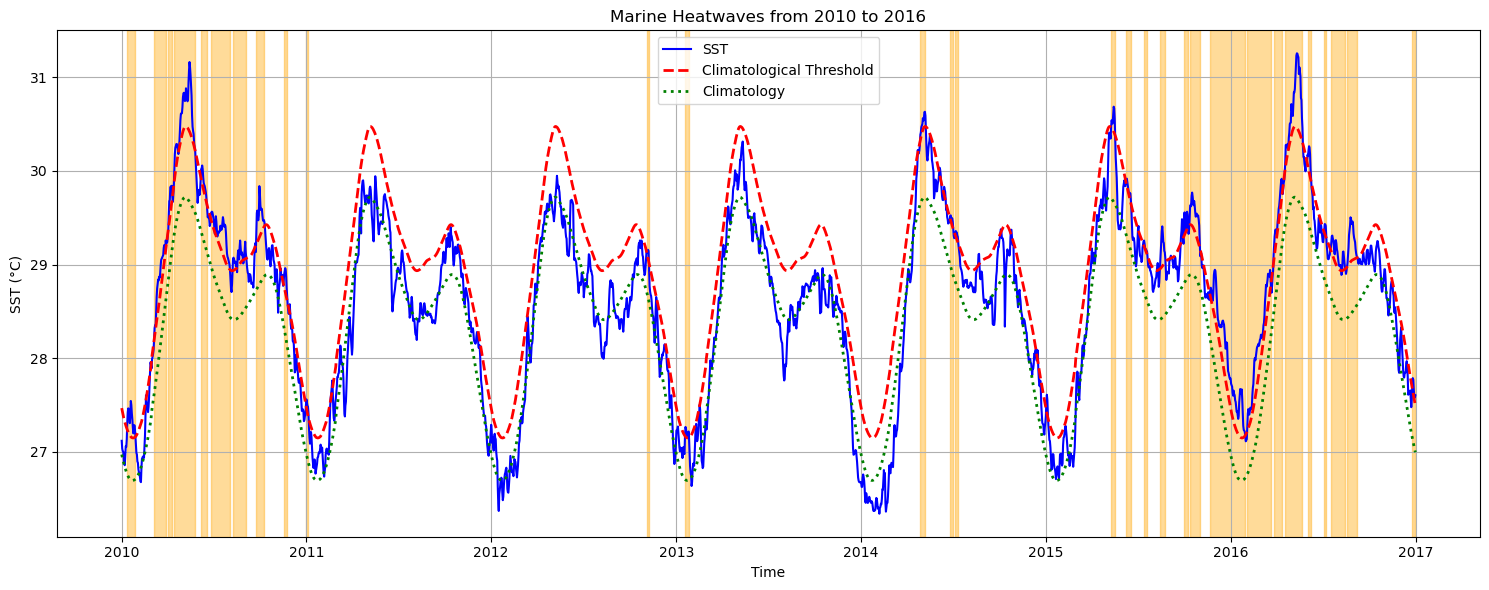

In [2]:
file_path = "Data_sst_2020/bay_of_bengal.nc"
ds, sst, t = mhw_eda.load_and_prepare_data(file_path)
mhws, clim = mhw_eda.detect_mhw(t, sst)

# Label MHWs 
mhw_labels = mhw_eda.label_mhw_events(t, mhws)
ds = mhw_eda.update_dataset(ds, mhw_labels, clim)
mhw_eda.print_mhw_summary(mhws)

# Plots
mhw_eda.plot_sst_with_mhws(t, sst, mhws, clim)
mhw_eda.plot_filled_mhw_areas(t, sst, mhws, clim, 2010, 2016)


Total Marine Heatwave Events: 74

Details of Detected Marine Heatwaves:
Event 1:
  Start Date       : 1982-09-21
  End Date         : 1982-09-25
  Duration         : 5 days
  Max Intensity    : 0.61 °C
  Mean Intensity   : 0.54 °C
  Cumulative Int.  : 2.71 °C·days
----------------------------------------
Event 2:
  Start Date       : 1982-10-04
  End Date         : 1982-10-08
  Duration         : 5 days
  Max Intensity    : 0.92 °C
  Mean Intensity   : 0.73 °C
  Cumulative Int.  : 3.64 °C·days
----------------------------------------
Event 3:
  Start Date       : 1983-05-15
  End Date         : 1983-05-24
  Duration         : 10 days
  Max Intensity    : 0.98 °C
  Mean Intensity   : 0.89 °C
  Cumulative Int.  : 8.90 °C·days
----------------------------------------
Event 4:
  Start Date       : 1983-05-29
  End Date         : 1983-06-02
  Duration         : 5 days
  Max Intensity    : 0.78 °C
  Mean Intensity   : 0.75 °C
  Cumulative Int.  : 3.73 °C·days
--------------------------------

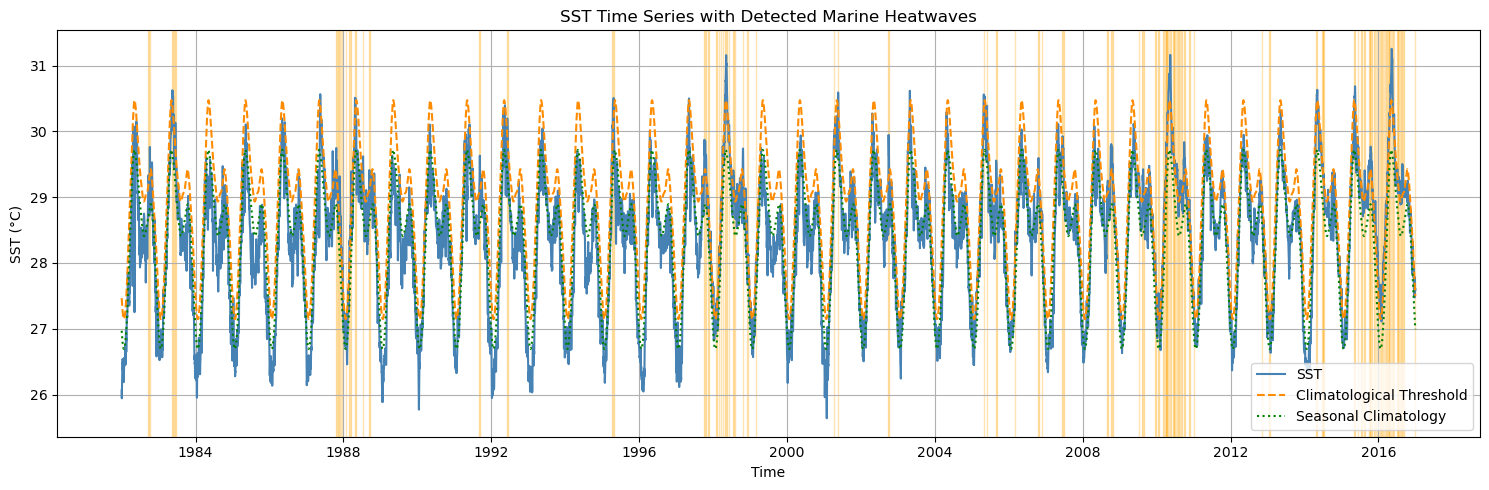

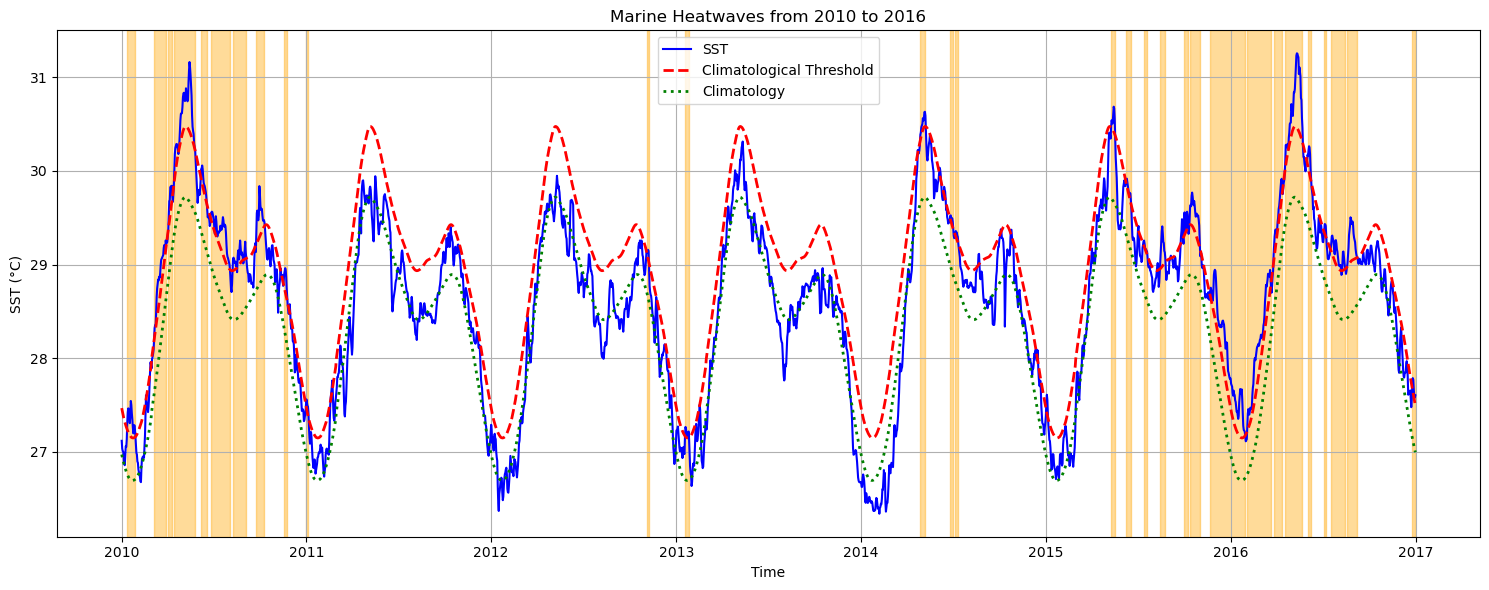

In [2]:
file_path = "Data_sst_2020/bay_of_bengal.nc"
ds, sst, t = mhw_eda.load_and_prepare_data(file_path)
mhws, clim = mhw_eda.detect_mhw(t, sst)

# Label MHWs 
mhw_labels = mhw_eda.label_mhw_events(t, mhws)
ds = mhw_eda.update_dataset(ds, mhw_labels, clim)
mhw_eda.print_mhw_summary(mhws)

# Plots
mhw_eda.plot_sst_with_mhws(t, sst, mhws, clim)
mhw_eda.plot_filled_mhw_areas(t, sst, mhws, clim, 2010, 2016)


##### Testing Dataset Analysis

In [3]:
train_ds, train_sst, train_t = mhw_eda.load_and_prepare_data(file_path)
test_ds, test_sst, test_t = mhw_eda.prepare_testing_dataset(file_path)

# Detect MHWs in test data using training climatology
mhws_test, clim_test = mhw_eda.detect_mhw_using_training_climatology(test_t, test_sst, train_t, train_sst)
mhw_labels_test = mhw_eda.label_mhw_events_for_testing(test_t, mhws_test)
updated_test_ds = mhw_eda.update_testing_dataset(test_ds, mhw_labels_test, clim_test)


In [4]:
updated_test_ds

<xarray.Dataset>
Dimensions:         (time: 1461)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2020-12-31
Data variables:
    sst             (time) float32 27.6 27.57 27.44 27.36 ... 27.47 27.58 27.58
    mhw_label       (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    clim_threshold  (time) float64 27.47 27.44 27.41 27.38 ... 27.56 27.53 27.5
    clim_seas       (time) float64 26.97 26.95 26.92 26.9 ... 27.04 27.02 26.99

In [5]:
updated_test_ds_df = updated_test_ds.to_dataframe()

In [6]:
updated_test_ds_df['mhw_label'].value_counts()

mhw_label
0.0    1047
1.0     414
Name: count, dtype: int64

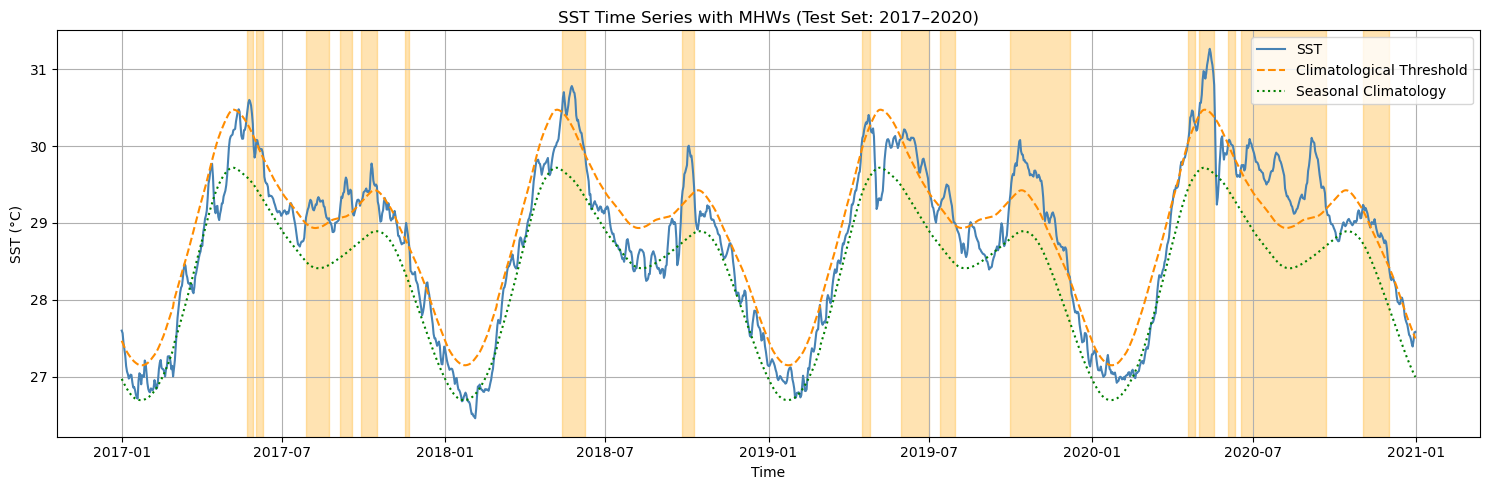

In [7]:
mhw_eda.plot_sst_with_mhws(test_t, test_sst, mhws_test, clim_test, title="SST Time Series with MHWs (Test Set: 2017–2020)")

##### Catergories of MHWS

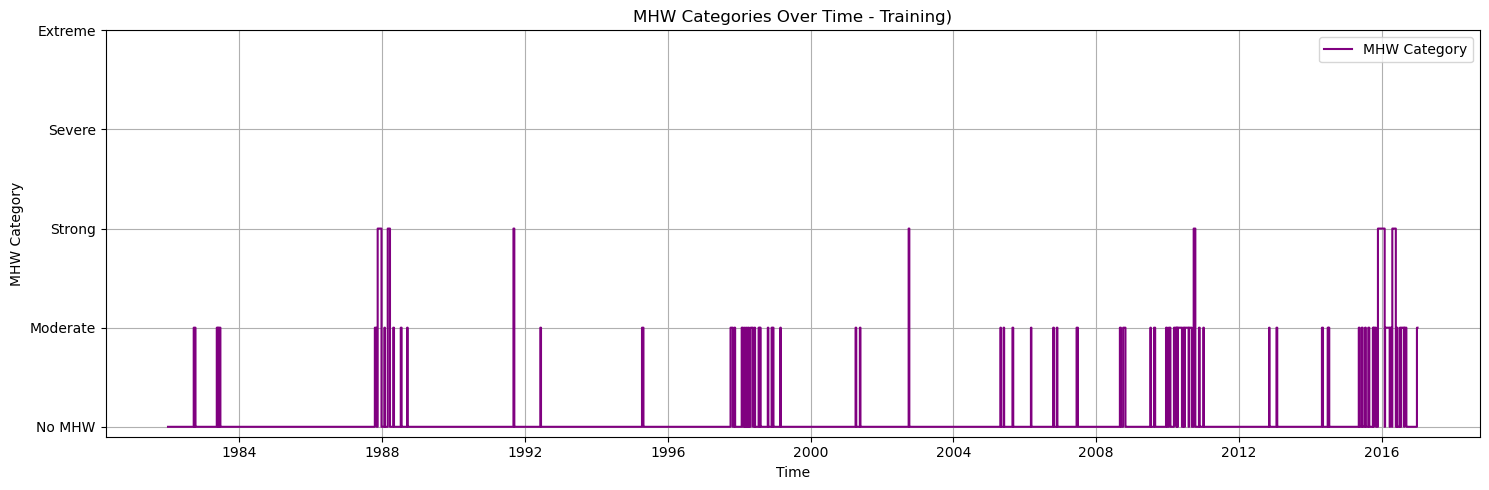

Number of MHW events (and total days) by category:
  Moderate: 67 events, total days = 787
  Strong: 7 events, total days = 200
  Severe: 0 events, total days = 0
  Extreme: 0 events, total days = 0


In [8]:
cat_labels = mhw_eda.label_mhw_categories(t, mhws)

mhw_eda.plot_mhw_categories(t, cat_labels, title="MHW Categories Over Time - Training)")
mhw_eda.print_mhw_category_counts(mhws)


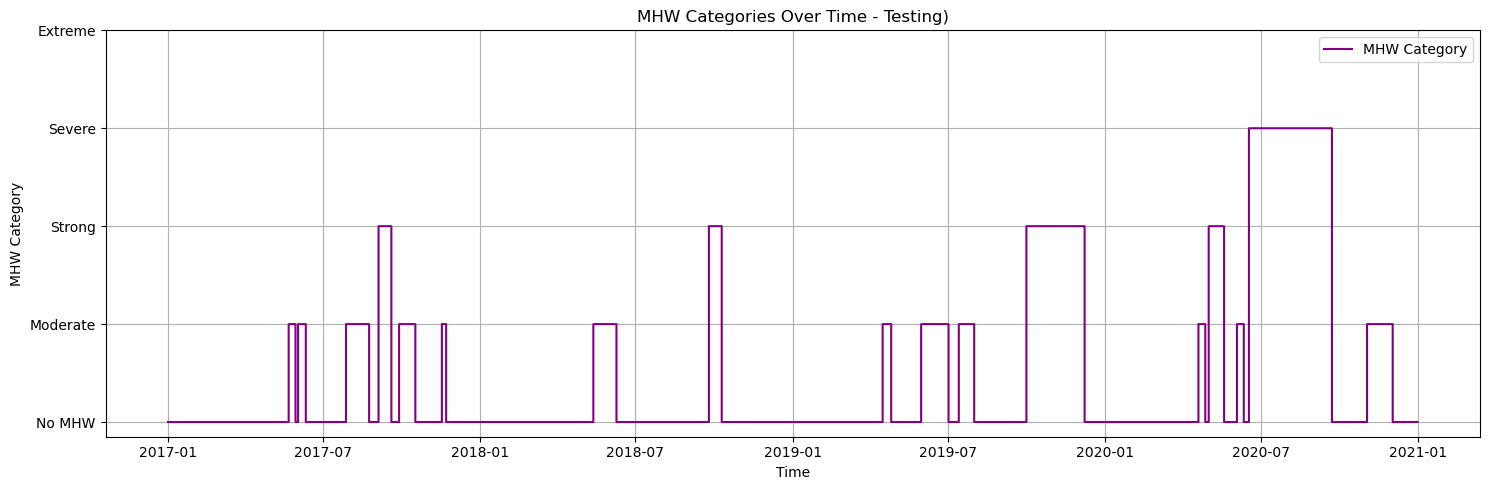

Number of MHW events (and total days) by category:
  Moderate: 12 events, total days = 201
  Strong: 4 events, total days = 116
  Severe: 1 events, total days = 97
  Extreme: 0 events, total days = 0


In [9]:
cat_labels_test = mhw_eda.label_mhw_categories(test_t, mhws_test)

mhw_eda.plot_mhw_categories(test_t, cat_labels_test, title="MHW Categories Over Time - Testing)")
mhw_eda.print_mhw_category_counts(mhws_test)


### Gulf of Mannar

##### Training Dataset Analysis

Total Marine Heatwave Events: 71

Details of Detected Marine Heatwaves:
Event 1:
  Start Date       : 1982-04-23
  End Date         : 1982-04-29
  Duration         : 7 days
  Max Intensity    : 1.07 °C
  Mean Intensity   : 1.00 °C
  Cumulative Int.  : 7.01 °C·days
----------------------------------------
Event 2:
  Start Date       : 1982-08-08
  End Date         : 1982-08-13
  Duration         : 6 days
  Max Intensity    : 1.07 °C
  Mean Intensity   : 0.98 °C
  Cumulative Int.  : 5.90 °C·days
----------------------------------------
Event 3:
  Start Date       : 1982-10-12
  End Date         : 1982-10-17
  Duration         : 6 days
  Max Intensity    : 1.10 °C
  Mean Intensity   : 0.95 °C
  Cumulative Int.  : 5.70 °C·days
----------------------------------------
Event 4:
  Start Date       : 1982-10-24
  End Date         : 1982-10-29
  Duration         : 6 days
  Max Intensity    : 0.96 °C
  Mean Intensity   : 0.83 °C
  Cumulative Int.  : 4.97 °C·days
---------------------------------

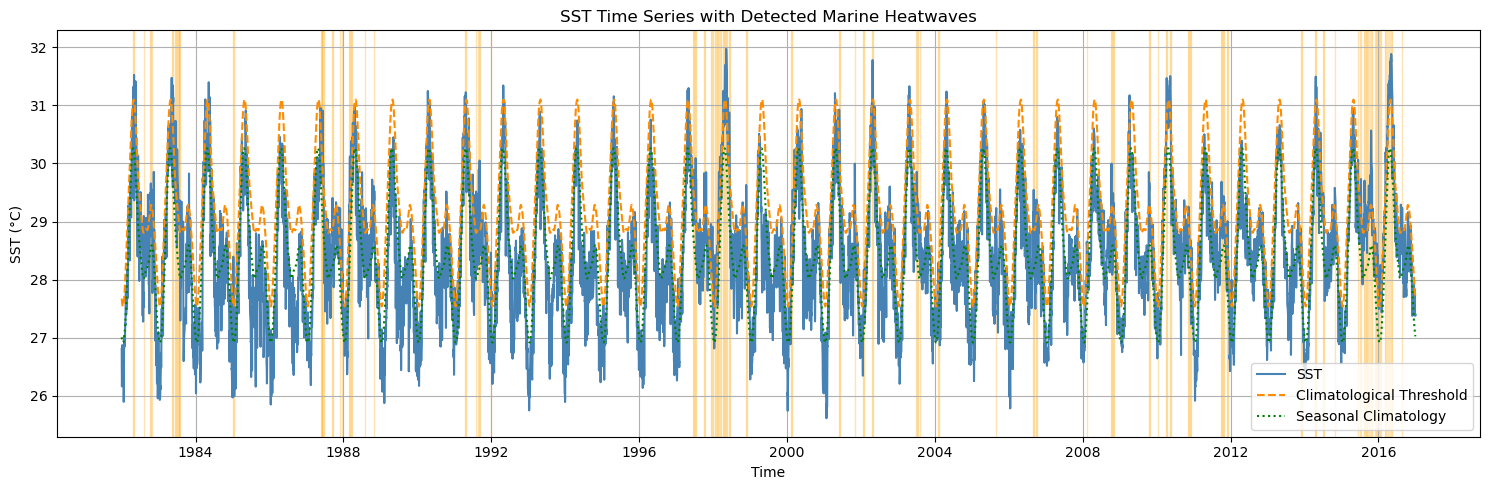

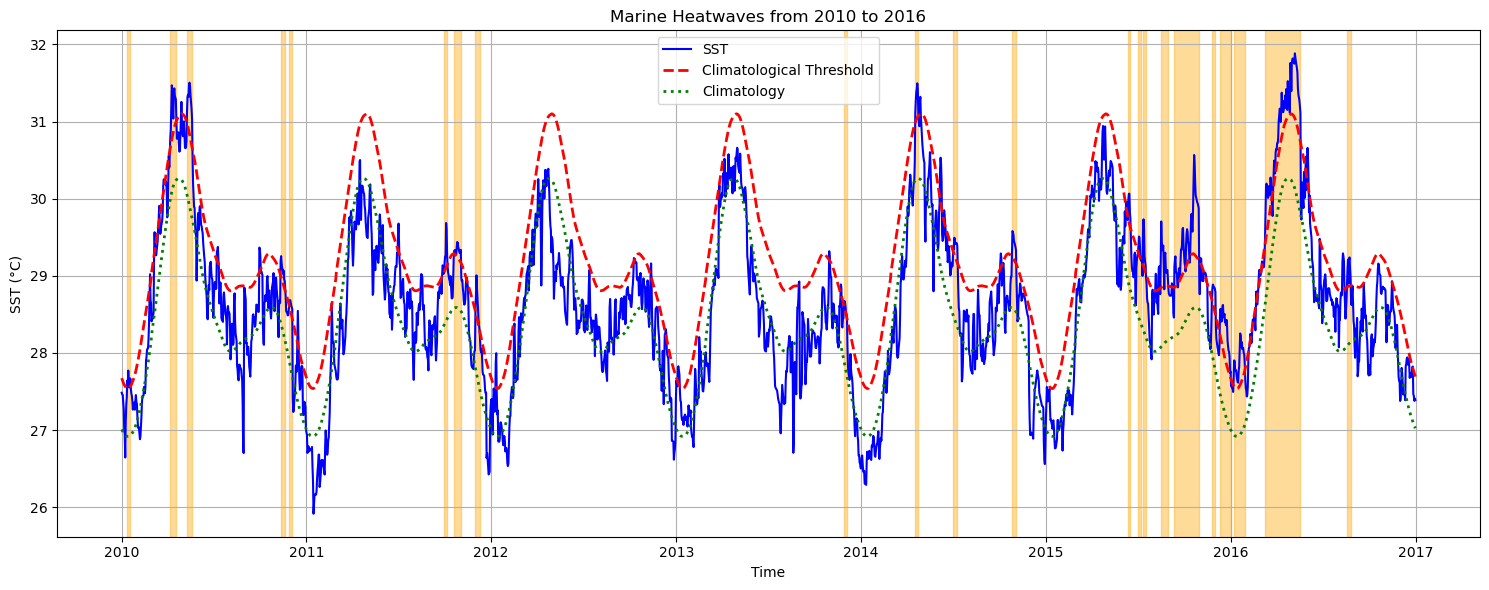

In [10]:
file_path = "Data_sst_2020/gulf_of_mannar.nc"
ds, sst, t = mhw_eda.load_and_prepare_data(file_path)

# Detect MHWs
mhws, clim = mhw_eda.detect_mhw(t, sst)
mhw_labels = mhw_eda.label_mhw_events(t, mhws)
ds = mhw_eda.update_dataset(ds, mhw_labels, clim)
mhw_eda.print_mhw_summary(mhws)
mhw_eda.plot_sst_with_mhws(t, sst, mhws, clim)
mhw_eda.plot_filled_mhw_areas(t, sst, mhws, clim, 2010, 2016)


##### Testing Dataset Analysis

In [11]:
train_ds, train_sst, train_t = mhw_eda.load_and_prepare_data(file_path)
test_ds, test_sst, test_t = mhw_eda.prepare_testing_dataset(file_path)

# Detect MHWs in test data using training climatology
mhws_test, clim_test = mhw_eda.detect_mhw_using_training_climatology(test_t, test_sst, train_t, train_sst)
mhw_labels_test = mhw_eda.label_mhw_events_for_testing(test_t, mhws_test)
updated_test_ds = mhw_eda.update_testing_dataset(test_ds, mhw_labels_test, clim_test)


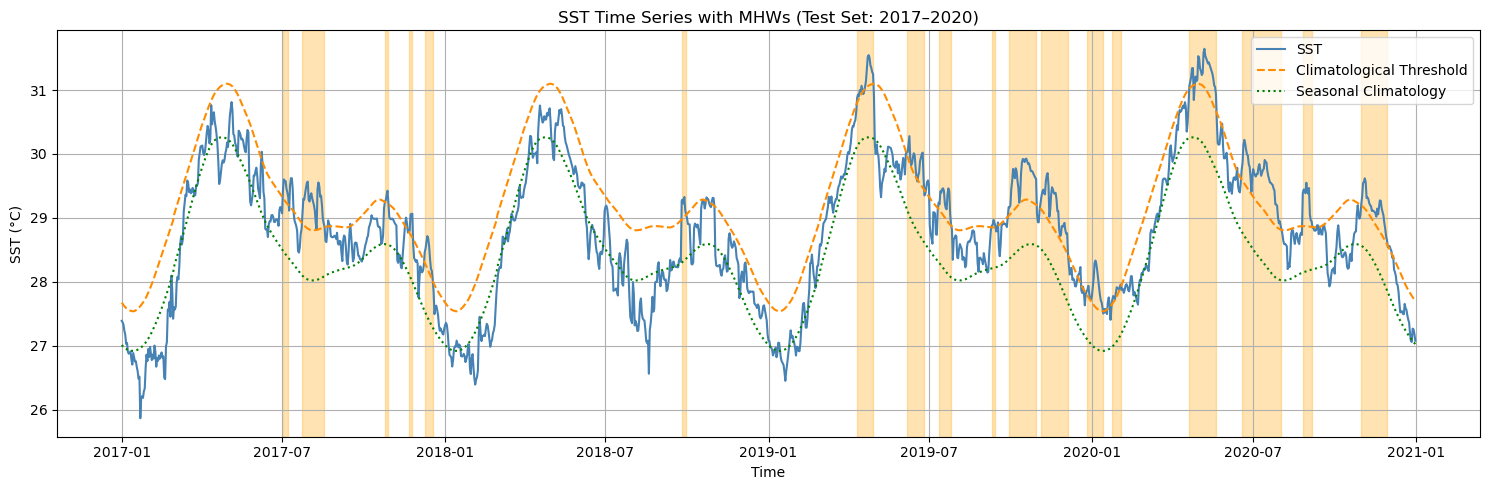

In [12]:
mhw_eda.plot_sst_with_mhws(test_t, test_sst, mhws_test, clim_test, title="SST Time Series with MHWs (Test Set: 2017–2020)")

##### Catergorical MHWs

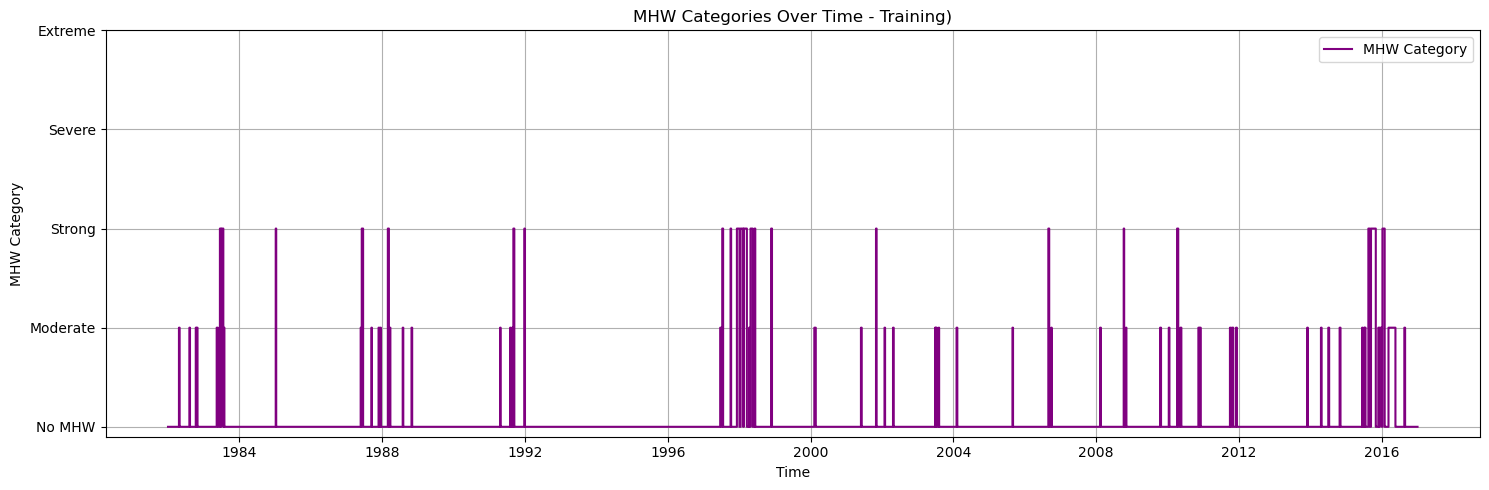

Number of MHW events (and total days) by category:
  Moderate: 49 events, total days = 442
  Strong: 22 events, total days = 329
  Severe: 0 events, total days = 0
  Extreme: 0 events, total days = 0


In [13]:
cat_labels = mhw_eda.label_mhw_categories(t, mhws)
mhw_eda.plot_mhw_categories(t, cat_labels, title="MHW Categories Over Time - Training)")
mhw_eda.print_mhw_category_counts(mhws)



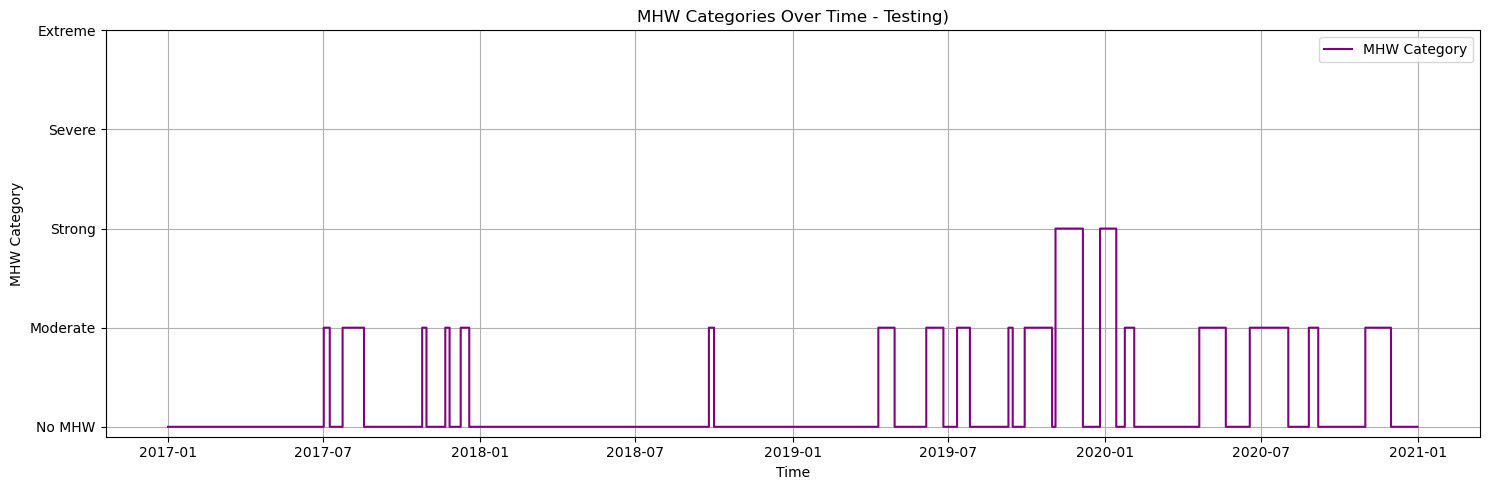

Number of MHW events (and total days) by category:
  Moderate: 16 events, total days = 277
  Strong: 2 events, total days = 51
  Severe: 0 events, total days = 0
  Extreme: 0 events, total days = 0


In [14]:
cat_labels_test = mhw_eda.label_mhw_categories(test_t, mhws_test)
mhw_eda.plot_mhw_categories(test_t, cat_labels_test, title="MHW Categories Over Time - Testing)")
mhw_eda.print_mhw_category_counts(mhws_test)


### Laccadive Sea

##### Training Dataset Analysis

Total Marine Heatwave Events: 65

Details of Detected Marine Heatwaves:
Event 1:
  Start Date       : 1982-05-04
  End Date         : 1982-05-08
  Duration         : 5 days
  Max Intensity    : 1.21 °C
  Mean Intensity   : 0.91 °C
  Cumulative Int.  : 4.54 °C·days
----------------------------------------
Event 2:
  Start Date       : 1982-05-13
  End Date         : 1982-05-25
  Duration         : 13 days
  Max Intensity    : 1.15 °C
  Mean Intensity   : 0.89 °C
  Cumulative Int.  : 11.61 °C·days
----------------------------------------
Event 3:
  Start Date       : 1982-10-12
  End Date         : 1982-10-17
  Duration         : 6 days
  Max Intensity    : 1.05 °C
  Mean Intensity   : 0.89 °C
  Cumulative Int.  : 5.31 °C·days
----------------------------------------
Event 4:
  Start Date       : 1983-06-30
  End Date         : 1983-07-12
  Duration         : 13 days
  Max Intensity    : 1.10 °C
  Mean Intensity   : 0.77 °C
  Cumulative Int.  : 10.05 °C·days
-----------------------------

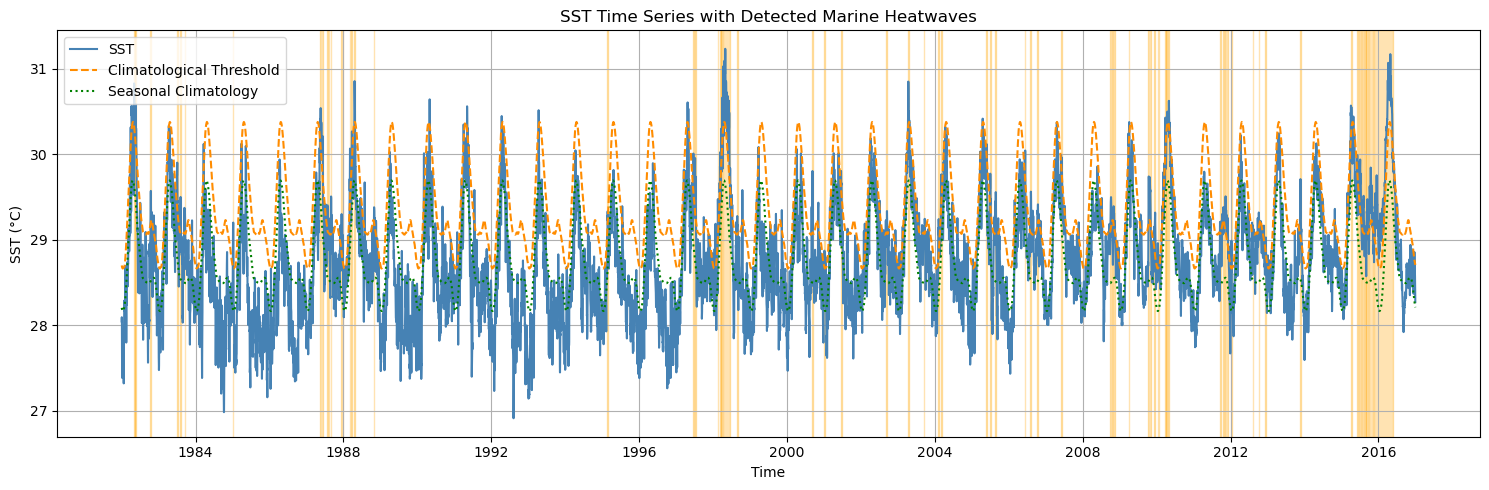

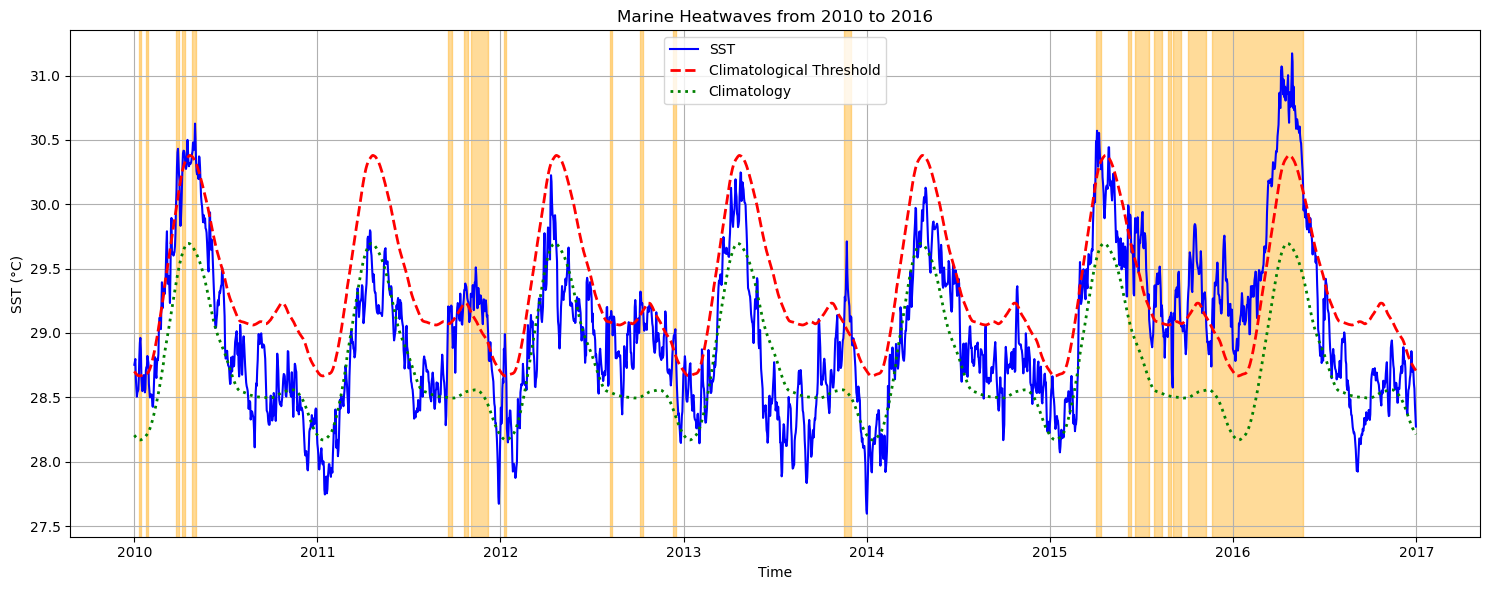

In [15]:
file_path = "Data_sst_2020/laccadive_sea.nc"
ds, sst, t = mhw_eda.load_and_prepare_data(file_path)

# Detect MHWs
mhws, clim = mhw_eda.detect_mhw(t, sst)
mhw_labels = mhw_eda.label_mhw_events(t, mhws)
ds = mhw_eda.update_dataset(ds, mhw_labels, clim)
mhw_eda.print_mhw_summary(mhws)
mhw_eda.plot_sst_with_mhws(t, sst, mhws, clim)
mhw_eda.plot_filled_mhw_areas(t, sst, mhws, clim, 2010, 2016)


##### Testing Dataset Analysis

In [16]:
train_ds, train_sst, train_t = mhw_eda.load_and_prepare_data(file_path)
test_ds, test_sst, test_t = mhw_eda.prepare_testing_dataset(file_path)

# Detect MHWs in test data using training climatology
mhws_test, clim_test = mhw_eda.detect_mhw_using_training_climatology(test_t, test_sst, train_t, train_sst)
mhw_labels_test = mhw_eda.label_mhw_events_for_testing(test_t, mhws_test)
updated_test_ds = mhw_eda.update_testing_dataset(test_ds, mhw_labels_test, clim_test)


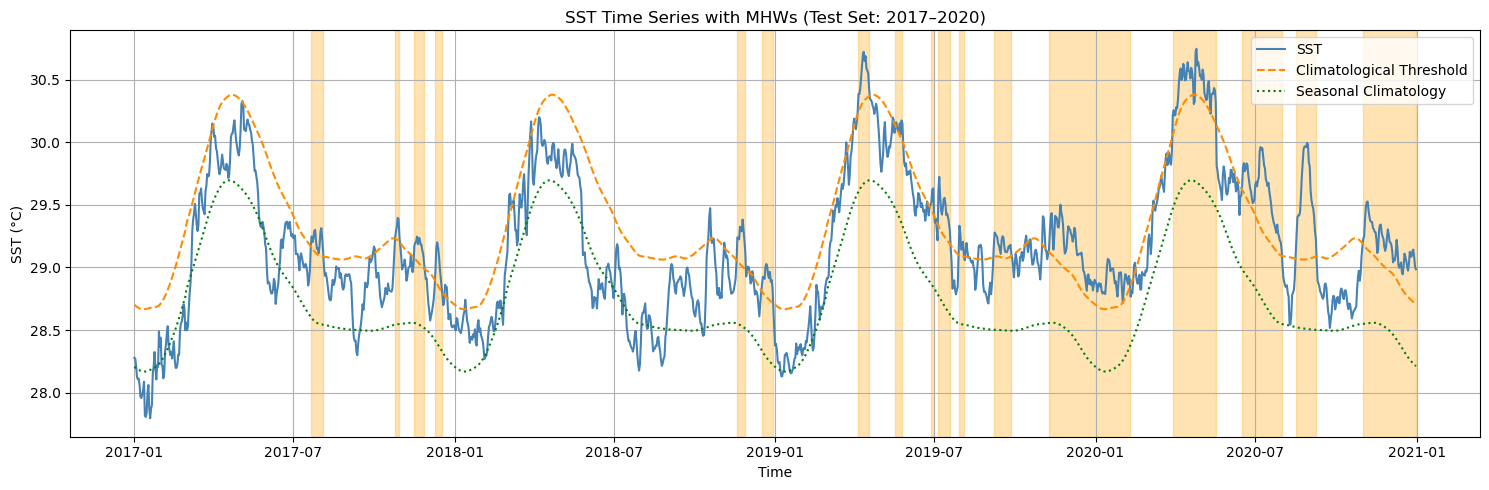

In [17]:
mhw_eda.plot_sst_with_mhws(test_t, test_sst, mhws_test, clim_test, title="SST Time Series with MHWs (Test Set: 2017–2020)")


In [18]:
up_df = updated_test_ds.to_dataframe()
up_df['mhw_label'].value_counts()

mhw_label
0.0    1053
1.0     408
Name: count, dtype: int64

##### Catergorical MHWs

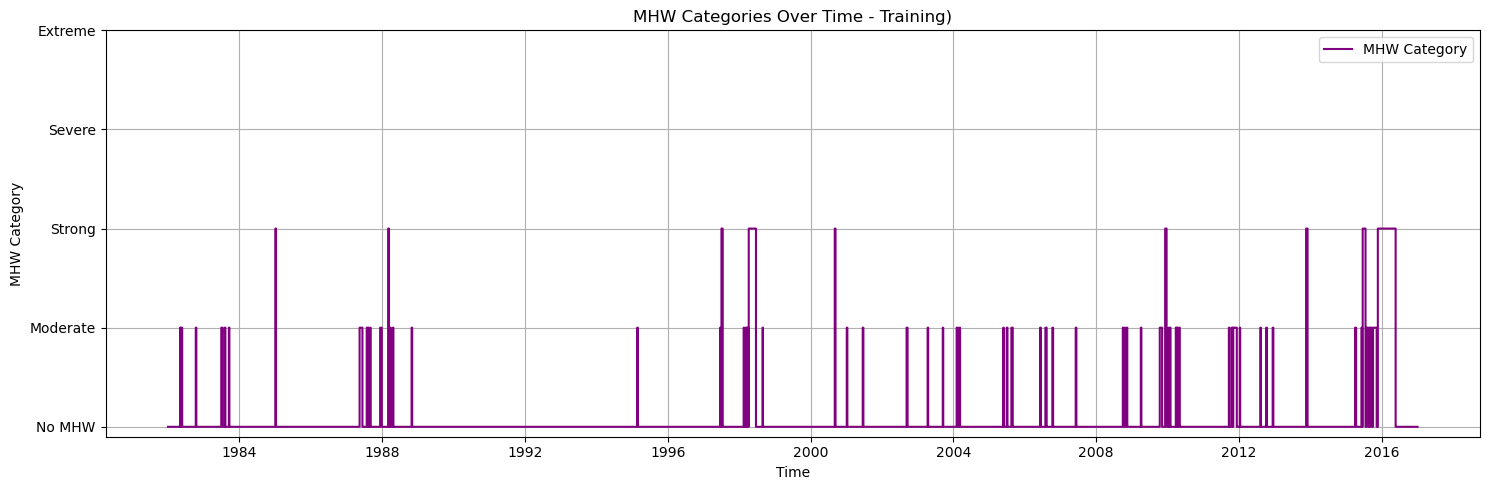

Number of MHW events (and total days) by category:
  Moderate: 56 events, total days = 568
  Strong: 9 events, total days = 352
  Severe: 0 events, total days = 0
  Extreme: 0 events, total days = 0


In [19]:
cat_labels = mhw_eda.label_mhw_categories(t, mhws)
mhw_eda.plot_mhw_categories(t, cat_labels, title="MHW Categories Over Time - Training)")
mhw_eda.print_mhw_category_counts(mhws)

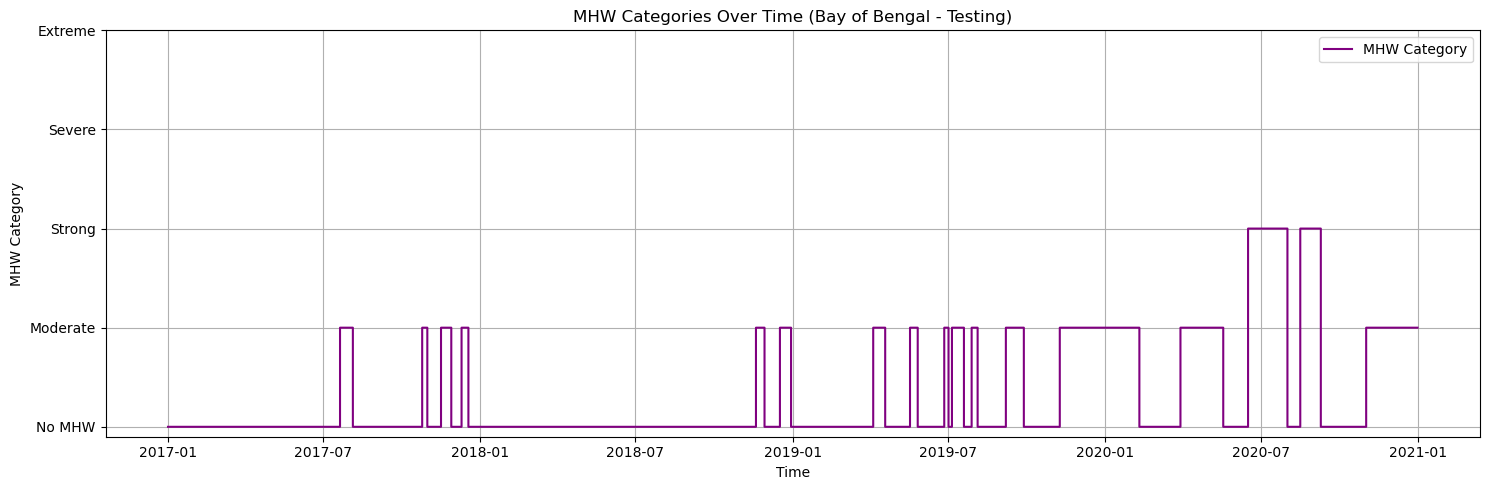

Number of MHW events (and total days) by category:
  Moderate: 15 events, total days = 338
  Strong: 2 events, total days = 70
  Severe: 0 events, total days = 0
  Extreme: 0 events, total days = 0


In [20]:
cat_labels_test = mhw_eda.label_mhw_categories(test_t, mhws_test)
mhw_eda.plot_mhw_categories(test_t, cat_labels_test, title="MHW Categories Over Time (Bay of Bengal - Testing)")
mhw_eda.print_mhw_category_counts(mhws_test)


### Sri Lankan Coast

##### Training Dataset Analysis

Total Marine Heatwave Events: 67

Details of Detected Marine Heatwaves:
Event 1:
  Start Date       : 1982-04-11
  End Date         : 1982-04-15
  Duration         : 5 days
  Max Intensity    : 1.01 °C
  Mean Intensity   : 0.81 °C
  Cumulative Int.  : 4.05 °C·days
----------------------------------------
Event 2:
  Start Date       : 1982-05-20
  End Date         : 1982-05-25
  Duration         : 6 days
  Max Intensity    : 1.15 °C
  Mean Intensity   : 0.97 °C
  Cumulative Int.  : 5.83 °C·days
----------------------------------------
Event 3:
  Start Date       : 1983-04-05
  End Date         : 1983-04-09
  Duration         : 5 days
  Max Intensity    : 0.92 °C
  Mean Intensity   : 0.83 °C
  Cumulative Int.  : 4.14 °C·days
----------------------------------------
Event 4:
  Start Date       : 1983-07-20
  End Date         : 1983-07-27
  Duration         : 8 days
  Max Intensity    : 0.80 °C
  Mean Intensity   : 0.73 °C
  Cumulative Int.  : 5.86 °C·days
---------------------------------

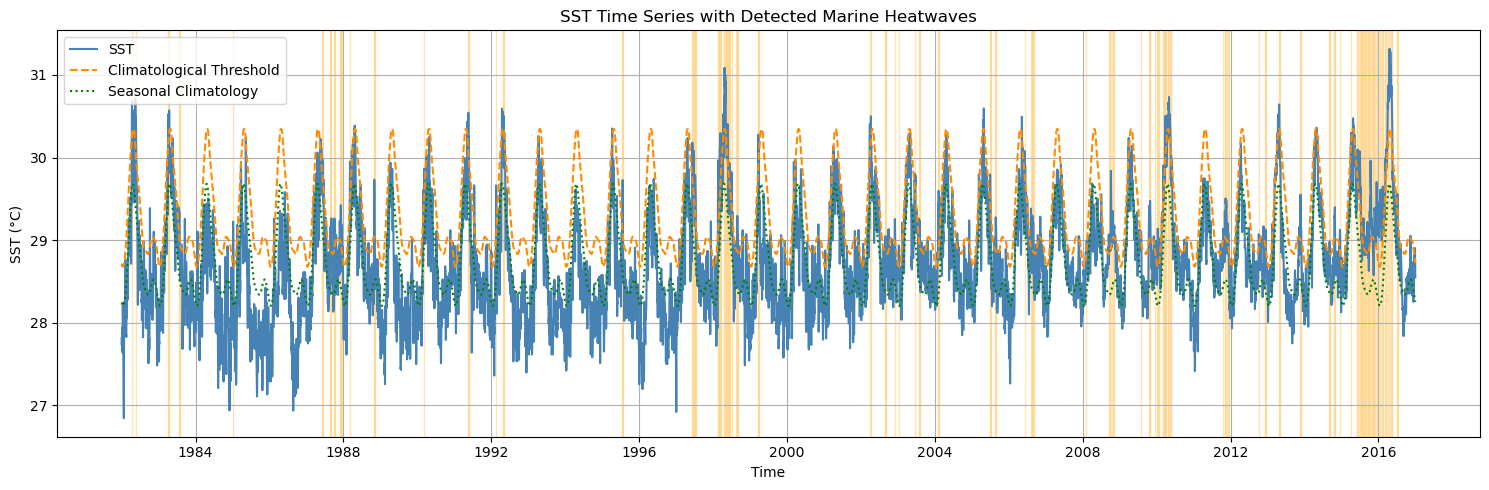

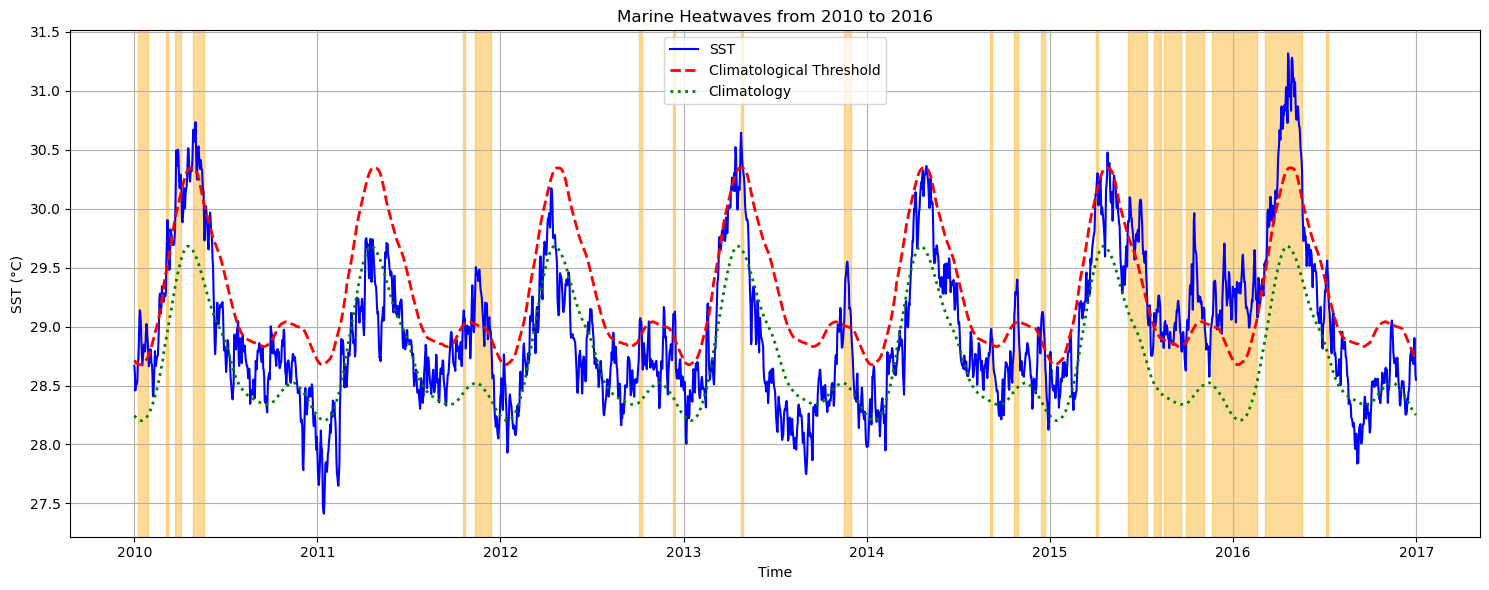

In [21]:
file_path = "Data_sst_2020/sri_lankan_coast.nc"
ds, sst, t = mhw_eda.load_and_prepare_data(file_path)

# Detect MHWs
mhws, clim = mhw_eda.detect_mhw(t, sst)
mhw_labels = mhw_eda.label_mhw_events(t, mhws)
ds = mhw_eda.update_dataset(ds, mhw_labels, clim)
mhw_eda.print_mhw_summary(mhws)
mhw_eda.plot_sst_with_mhws(t, sst, mhws, clim)
mhw_eda.plot_filled_mhw_areas(t, sst, mhws, clim, 2010, 2016)


##### Testing Dataset Analysis

In [22]:
train_ds, train_sst, train_t = mhw_eda.load_and_prepare_data(file_path)
test_ds, test_sst, test_t = mhw_eda.prepare_testing_dataset(file_path)

# Detect MHWs in test data using training climatology
mhws_test, clim_test = mhw_eda.detect_mhw_using_training_climatology(test_t, test_sst, train_t, train_sst)
mhw_labels_test = mhw_eda.label_mhw_events_for_testing(test_t, mhws_test)
updated_test_ds = mhw_eda.update_testing_dataset(test_ds, mhw_labels_test, clim_test)


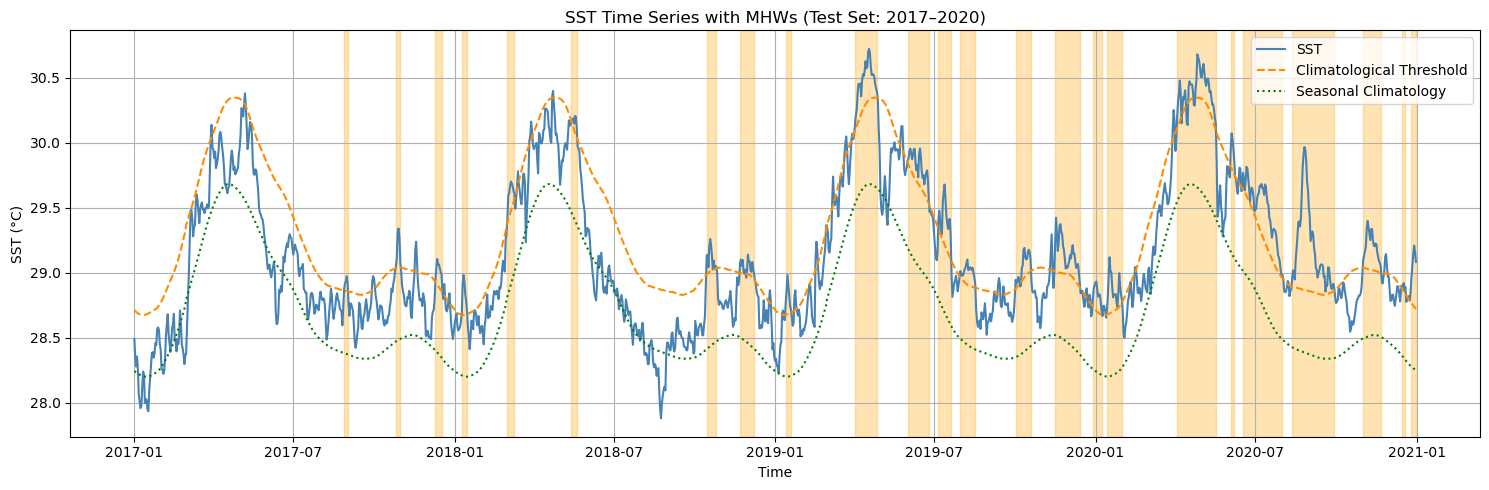

In [23]:
mhw_eda.plot_sst_with_mhws(test_t, test_sst, mhws_test, clim_test, title="SST Time Series with MHWs (Test Set: 2017–2020)")


In [24]:
up_df = updated_test_ds.to_dataframe()
up_df['mhw_label'].value_counts()

mhw_label
0.0    1045
1.0     416
Name: count, dtype: int64

##### Catergorical MHWs

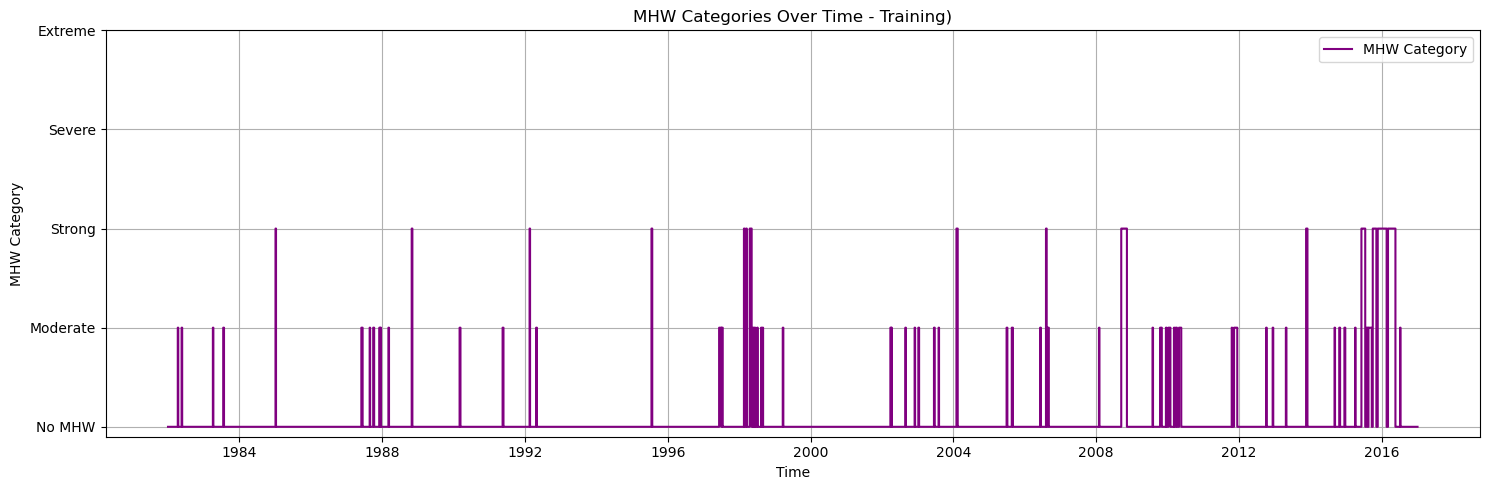

Number of MHW events (and total days) by category:
  Moderate: 52 events, total days = 488
  Strong: 15 events, total days = 393
  Severe: 0 events, total days = 0
  Extreme: 0 events, total days = 0


In [25]:
cat_labels = mhw_eda.label_mhw_categories(t, mhws)

mhw_eda.plot_mhw_categories(t, cat_labels, title="MHW Categories Over Time - Training)")
mhw_eda.print_mhw_category_counts(mhws)


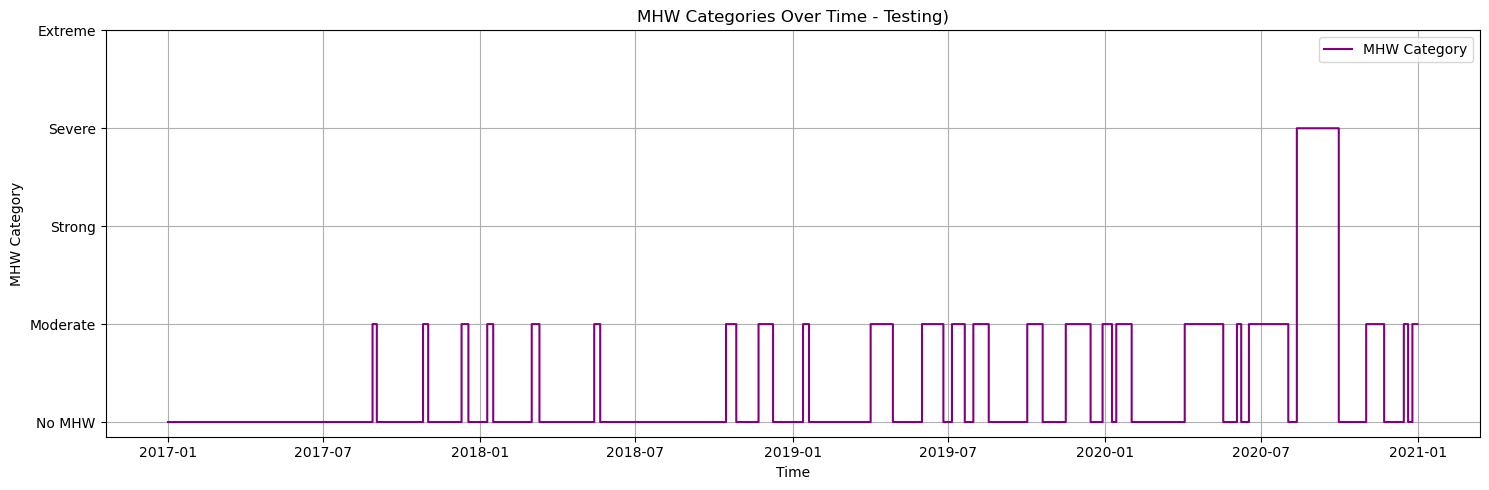

Number of MHW events (and total days) by category:
  Moderate: 23 events, total days = 367
  Strong: 0 events, total days = 0
  Severe: 1 events, total days = 49
  Extreme: 0 events, total days = 0


In [26]:
cat_labels_test = mhw_eda.label_mhw_categories(test_t, mhws_test)
mhw_eda.plot_mhw_categories(test_t, cat_labels_test, title="MHW Categories Over Time - Testing)")
mhw_eda.print_mhw_category_counts(mhws_test)
